In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
data = pd.read_csv(r'C:\Users\HP\Pandas_codegym\Phân tích bộ dữ liệu Online_retailer\OnlineRetail.csv', encoding = 'unicode_escape')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Chọn mục tiêu Vẽ biểu đồ đường thể hiện xu hướng thay đổi số lượng đơn hàng theo thời gian trong năm 2011. Vẽ biểu đồ cột so sánh số lượng đơn hàng trong các tháng của năm 2011.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [24]:
#Kiểm tra dữ liệu trùng lặp
data.drop_duplicates(subset = 'InvoiceNo', keep ='first', inplace=True)
data.shape[0]
data.reset_index(inplace=True)
data

,index,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Month,Year
0,0,12/1/2010 8:26,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12/1/2010,12,2010
1,1,12/1/2010 8:28,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,12/1/2010,12,2010
2,2,12/1/2010 8:34,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,12/1/2010,12,2010
3,3,12/1/2010 8:34,536368,22960,JAM MAKING SET WITH JARS,6,4.25,13047.0,United Kingdom,12/1/2010,12,2010
4,4,12/1/2010 8:35,536369,21756,BATH BUILDING BLOCK WORD,3,5.95,13047.0,United Kingdom,12/1/2010,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
25895,25895,12/9/2011 12:23,581583,20725,LUNCH BAG RED RETROSPOT,40,1.45,13777.0,United Kingdom,12/9/2011,12,2011
25896,25896,12/9/2011 12:25,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,0.72,13777.0,United Kingdom,12/9/2011,12,2011
25897,25897,12/9/2011 12:31,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,0.39,15804.0,United Kingdom,12/9/2011,12,2011
25898,25898,12/9/2011 12:49,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95,13113.0,United Kingdom,12/9/2011,12,2011


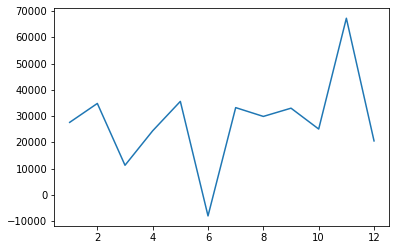

In [26]:
data['Date'] = data['InvoiceDate'].str.split(' ').str[0]
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Year'] = pd.to_datetime(data['Date']).dt.year
#Số lượng hàng trong năm 2021
d1 = data[data['Year']==2011].groupby('Month')['Quantity'].sum()
plt.plot(d1.index, d1.values)
plt.show()

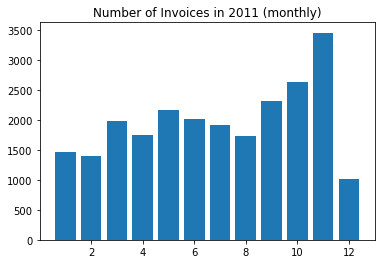

In [22]:
#tỔNG SỐ lượng đơn hàng đã đặt trong năm 2011
d2 = data[data['Year']==2011].groupby('Month')['InvoiceNo'].count()
plt.bar(d2.index,d2.values)
plt.title('Number of Invoices in 2011 (monthly)')
plt.show()

It is clear that the number of invoices fluctuate from month to month in 2011 and reach a peak in november.